# Malayalam

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 6.37 s, sys: 1.11 s, total: 7.48 s
Wall time: 11.6 s


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/Fake_train.csv")
dev_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/Fake_dev.csv")
test_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/Fake_test_with_labels malayalam.csv")

print("Total number of training samples:", len(train_df))
print("Total number of dev samples:", len(dev_df))
print("Total number of test samples:", len(test_df))

Mounted at /content/drive
Total number of training samples: 3257
Total number of dev samples: 815
Total number of test samples: 1019


In [ ]:
train_df.shape

(3257, 2)

In [ ]:
test_df.head()

,text,label
0,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,Fake
1,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,Fake
2,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,Fake
3,Shame for entire Woman&#39;s of Kerala,original
4,135 code janaghal andhu wide business cheythal...,Fake


In [ ]:
train_df.head()

,text,label
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake
1,Masha Allah,Fake
2,"അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...",Fake
3,Illathentha avaru purath vidayittalland verenth,Fake
4,Barana pakshathin matoru niyamam.nalla moyanth...,original


In [ ]:
with pd.option_context('display.max_colwidth', 0):
    display(test_df.head(n=10))

,text,label
0,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ കാരണം,Fake
1,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അങ്ങനെയാണ് ..ഇപ്പോൾ തോന്നുന്നത് ഇങ്ങനെയാണ് ...എന്തൊക്കെയോ ആവോ,Fake
2,"ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സംഘി ഭരിക്കുന്ന നോർത്ത് ഇന്ത്യയിലല്ല,ഇവിടെ ആരോഗ്യ മന്ത്രി ഷൈലടീച്ചറാണ്",Fake
3,Shame for entire Woman&#39;s of Kerala,original
4,135 code janaghal andhu wide business cheythalum vijayikum in India,Fake
5,"Why not all countries club together n block china to the maximum extend, and rename covid 19 as chinese virus? In all such cases when some one work to destroy others, the nature intervene n contain such negative force. That is the grace of god, the truth.",Fake
6,Ethil appuram നാണക്കേഡ് വന്നിട്ടില്ല cpmne🤣🤣🤣adipoli nalla avatharanam,original
7,കൊറോണ പോയി ഒന്ന് കൂടെ മെച്ചപ്പെട്ട് ഓമൈക്രോനായി വന്നപ്പോൾ നമ്മുടെ പിണുവിന്റെ നേതൃത്വത്തിൽ ഒരു സീകരണം കൊടുത്തതല്ലേ,original
8,മോളെ. ഇത് കോമഡി സ്റ്റാർസ് അല്ല. ചിരിച്ചും കളിച്ചും വിശേഷം ചോദിക്കാൻ,Fake
9,Marunaadan kandupidutham,Fake


## See Word Length

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'text' is the column containing the text
# Replace 'df' and 'text' with your actual DataFrame and column name

# Function to count words in a text
def count_words(text):
    words = str(text).split()  # Splitting text into words
    return len(words)  # Returning the count of words


# Applying the function to the 'text' column and creating a new column 'avg_word_length'
train_word_length = train_df['text'].apply(count_words)
dev_word_length = dev_df['text'].apply(count_words)
test_word_length = test_df['text'].apply(count_words)
# Displaying the DataFrame with average word lengths
#print(test_word_length)


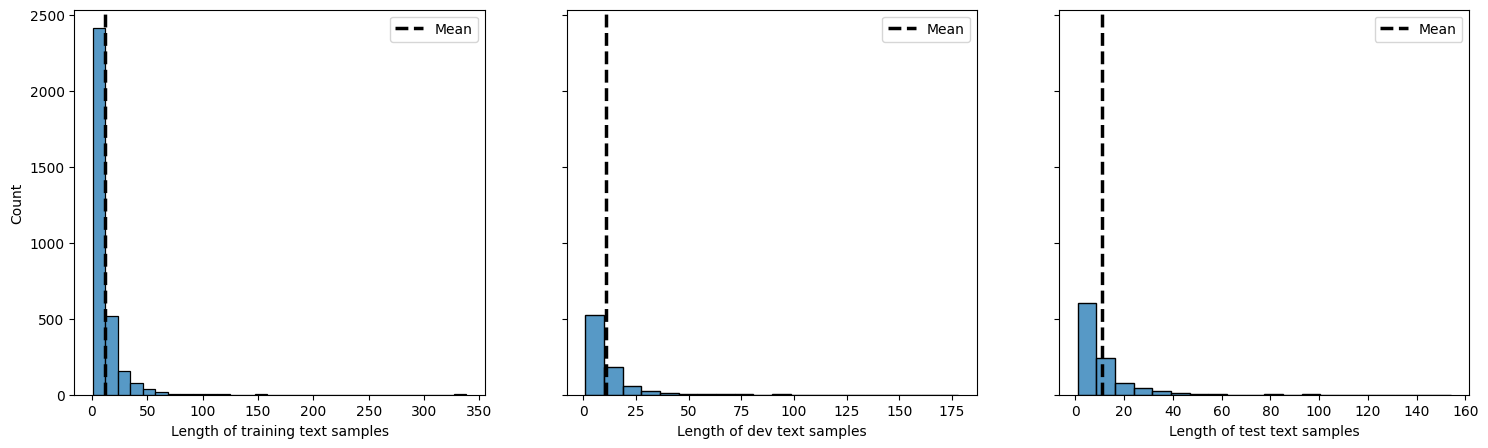

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

#train_lengths = train_df["text"].str.len()
sns.histplot(ax=axes[0], data=train_word_length, bins=30).set(xlabel="Length of training text samples")
axes[0].axvline(train_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

#dev_lengths = dev_df["text"].str.len()
sns.histplot(ax=axes[1], data=dev_word_length, bins=20).set(xlabel="Length of dev text samples")
axes[1].axvline(dev_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[1].legend()

#test_lengths = test_df["Text"].str.len()
sns.histplot(ax=axes[2], data=test_word_length, bins=20).set(xlabel="Length of test text samples")
axes[2].axvline(test_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[2].legend()


plt.show()

In [ ]:
print(f"Max words length of Train rows {train_word_length.max()}")
print(f"Max words length of Dev rows {dev_word_length.max()}")
print(f"Max words length of Test rows {test_word_length.max()}")

Max words length of Train rows 338
Max words length of Dev rows 178
Max words length of Test rows 154


In [ ]:
import re

train_corpus = train_df["text"].sum()
dev_corpus = dev_df["text"].sum()
test_corpus = test_df["text"].sum()

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

dev_corpus = re.sub(chars_to_ignore, ' ', dev_corpus)
dev_vocab = set(dev_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in dev data:", len(dev_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 18526
Number of unique words in dev data: 5581
Number of unique words in test data: 6738
Number of out-of-vocabulary (OOV) words: 4138


## See code mixed rows

In [ ]:
filtered_train = train_df[lambda x: x["text"].str.contains("[A-Za-z0-9]")]
print(filtered_train.shape)
filtered_dev = dev_df[lambda x: x["text"].str.contains("[A-Za-z0-9]")]
print(filtered_dev.shape)
filtered_test = test_df[lambda x: x["text"].str.contains("[A-Za-z0-9]")]
print(filtered_test.shape)

(1874, 2)
(475, 2)
(597, 2)


## Preprocessing

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoj = re.compile("["         # this emoj is to remove all emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    #english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=emoj.sub(r'',text)
    text=text.lower()
    text=re.sub(r'\s+', ' ', text)

    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'(https|http|www)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', text, flags=re.MULTILINE)

    text = text.replace('\n', ' ')
    text = text.replace('—', ' ')
    text = text.replace('_', ' ')
    text = text.replace('\r', ' ')
    text = re.sub(r'(\\)[a-zA-Z]+', ' ',text)
    # Stopword Removing

    #text=english_pattern.sub(r'', text)
    #def remove_emojis(text):
    #text= emoji.get_emoji_regexp().sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    #punctuations = '''````£|¢|Ñ+-*/=৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌😀😃😄😁😆😅😂🤣😊😇🙂🙃😉😌😍😘😗😙😚😋😛😝😜🤪🤨🧐🤓😎🤩🥳😏😒😞😔😟😕🙁☹️😣😖😫😩😤😠😡🤬😈👿💀☠️💩🤡👹👺👻👽👾🤖💋💌💘💝💖💗💓💞💕💟❣️💔❤️‍🔥🖤🤍💯💢💥💫💦💨🕳️💣💬👁️‍🗨️🗨️🗯️💭💤👋🤚🖐️✋🖖👌✌️🤞🤟🤘🤙👈👉👆👇☝️✍️👏👏🏻👏🏼👏🏽👏🏾👏🏿👍👍🏻👍🏼👍🏽👍🏾👍🏿👎👎🏻👎🏼👎🏽👎🏾👎🏿✊✊🏻✊🏼✊🏽✊🏾✊🏿🤛🤛🏻🤛🏼🤛🏽🤛🏾🤛🏿🤜🤜🏻🤜🏼🤜🏽🤜🏾🤜🏿🤝🙏🙏🏻🙏🏼🙏🏽🙏🏾🙏🏿✍️💅💅🏻💅🏼💅🏽💅🏾💅🏿🤳💪💪🏻💪🏼💪🏽💪🏾💪🏿🦾🦵🦿🦶👂👂🏻👂🏼👂🏽👂🏾👂🏿👃👃🏻👃🏼👃🏽👃🏾👃🏿👀🧠🫀🫁🦷🦴👅👄🦻🦻🏻🦻🏼🦻🏽🦻🏾🦻🏿👶👶🏻👶🏼👶🏽👶🏾👶🏿🧒🧒🏻🧒🏼🧒🏽🧒🏾🧒🏿👦👦🏻👦🏼👦🏽👦🏾👦🏿👧👧🏻👧🏼👧🏽👧🏾👧🏿🧑🧑🏻🧑🏼🧑🏽🧑🏾🧑🏿👨👨🏻👨🏼👨🏽👨🏾👨🏿👩👩🏻👩🏼👩🏽👩🏾👩🏿🧓🧓🏻🧓🏼🧓🏽🧓🏾🧓🏿👴👴🏻👴🏼👴🏽👴🏾👴🏿👵👵🏻👵🏼👵🏽👵🏾👵🏿👩‍🦰👩🏻‍🦰👩🏼‍🦰👩🏽‍🦰👩🏾‍🦰👩🏿‍🦰👩‍🦱👩🏻‍🦱👩🏼‍🦱👩🏽‍🦱👩🏾‍🦱👩🏿‍🦱👩‍🦳👩🏻‍🦳👩🏼‍🦳👩🏽‍🦳👩🏾‍🦳👩🏿‍🦳👩‍🦲👩🏻‍🦲👩🏼‍🦲👩🏽‍🦲👩🏾‍🦲👩🏿‍🦲👨‍🦰👨🏻‍🦰👨🏼‍🦰👨🏽‍🦰👨🏾‍🦰👨🏿‍🦰👨‍🦱👨🏻‍🦱👨🏼‍🦱👨🏽‍🦱👨🏾‍🦱👨🏿‍🦱👨‍🦳👨🏻‍🦳👨🏼👨🏽‍🦳👨🏾‍🦳👨🏿‍🦳👨‍🦲👨🏻‍🦲👨🏼‍🦲👨🏽‍🦲👨🏾‍🦲👨🏿‍🦲🦰🦱🦳🦲👱‍♀️👱🏻‍♀️❤️‍🩹❤️‍🔥❤️‍🩹🧡💛💚💙💜🤎�￰৷￰'''
    punctuations = '|¢|Ñ+-৳০১২৩৪৫৬৭৮৯।()-[]{}<>@#$%^&*_~—॥🤣⚽️✌😀💉�￰৷￰'
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
train_df['cleanText'] = train_df.text.apply(lambda x: preprocessing(str(x)))
test_df['cleanText'] = test_df.text.apply(lambda x: preprocessing(str(x)))
dev_df['cleanText']=dev_df.text.apply(lambda x: preprocessing(str(x)))
#test_df['cleanText']=test_df.cleanText.apply(lambda x: preprocessing(str(x)))

In [ ]:
# Convert content to string and handle 'NaN' values
train_df['cleanText'] = train_df['cleanText'].apply(lambda x: '' if pd.isna(x) else str(x))
test_df['cleanText'] = test_df['cleanText'].apply(lambda x: '' if pd.isna(x) else str(x))
dev_df['cleanText'] = dev_df['cleanText'].apply(lambda x: '' if pd.isna(x) else str(x))

In [ ]:
train_df.label.value_counts()

original    1658
Fake        1599
Name: label, dtype: int64

In [ ]:
test_df['label'].value_counts()

original    512
Fake        507
Name: label, dtype: int64

In [ ]:
dev_df['label'].value_counts()

original    409
Fake        406
Name: label, dtype: int64

In [ ]:
train_df['enc_label'] = train_df['label'].replace({'original':1, 'Fake':0})
dev_df['enc_label'] = dev_df['label'].replace({'original':1, 'Fake':0})
test_df['enc_label'] = test_df['label'].replace({'original':1, 'Fake':0})
train_df.tail(5)

,text,label,cleanText,enc_label
3252,വീണാ ജോർജ് എന്ന ഒരു ആരോഗ്യ മന്ത്രി വന്നതിനു ശേ...,original,വീണാ ജോർജ് എന്ന ഒരു ആരോഗ്യ മന്ത്രി വന്നതിനു ശേ...,1
3253,ഇതാണ് പിണുവാതിര😂😂😂,original,ഇതാണ് പിണുവാതിര,1
3254,കേസ് എടുക്കണം 💯👍,original,കേസ് എടുക്കണം,1
3255,എല്ലാത്തിനേം 501 സോപ്പിട്ട് കളിപ്പിച്ച് വിടണം,original,എല്ലാത്തിനേം 501 സോപ്പിട്ട് കളിപ്പിച്ച് വിടണം,1
3256,Day by day leaders r acting like a fool in dev...,original,day by day leaders r acting like a fool in dev...,1


In [ ]:
train_df.enc_label.value_counts()

1    1658
0    1599
Name: enc_label, dtype: int64

In [ ]:
X_train = train_df['cleanText'].tolist()
y_train = train_df['label'].tolist()
X_valid = dev_df['cleanText'].tolist()
y_valid = dev_df['label'].tolist()
X_test = test_df['cleanText']. tolist()
y_test = test_df['label'].tolist()

## Ktrain

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=ee9442a7af48b340bc8c986ca9147cc5ca95b0cf0ebe40eb17ad2de11c02960b
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import ktrain
from ktrain import text

In [ ]:
X_train = train_df['cleanText'].tolist()
y_train = train_df['label'].tolist()

X_valid = dev_df['cleanText'].tolist()
y_valid = dev_df['label'].tolist()

X_test = test_df['cleanText'].tolist()
y_test = test_df['label'].tolist()

In [ ]:
categories=['original','Fake']

### Distilmbert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=60,class_names=categories)    #try with mxlen=100

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train,y_train)
test = trans.preprocess_test(X_test,y_test)
#test = trans.preprocess_test(X_test,y_test)


preprocessing train...
language: ml
train sequence lengths:
	mean : 11
	95percentile : 35
	99percentile : 70


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 11
	95percentile : 33
	99percentile : 73


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
271/271 [==============================] - 97s 229ms/step - loss: 0.6930 - accuracy: 0.5169
Epoch 2/10
271/271 [==============================] - 66s 245ms/step - loss: 0.6908 - accuracy: 0.6268
Epoch 3/10
271/271 [==============================] - 65s 241ms/step - loss: 0.6007 - accuracy: 0.7492
Epoch 4/10
271/271 [==============================] - 65s 241ms/step - loss: 0.4385 - accuracy: 0.8108
Epoch 5/10
271/271 [==============================] - 65s 239ms/step - loss: 0.6929 - accuracy: 0.5069
Epoch 6/10
271/271 [==============================] - 65s 240ms/step - loss: 0.7129 - accuracy: 0.4884
Epoch 7/10
271/271 [==============================] - 33s 121ms/step - loss: 3.2092 - accuracy: 0.5039


done.
Visually inspect loss plot and select learning rate associated with falling loss


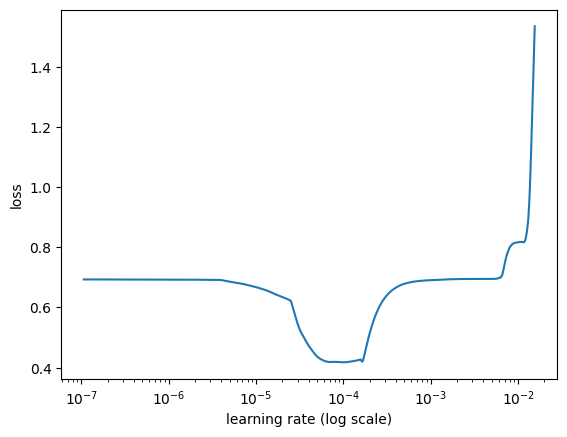

In [ ]:
learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
learner.fit_onecycle(3e-5,15)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
272/272 [==============================] - 68s 151ms/step - loss: 0.6629 - accuracy: 0.5920 - val_loss: 0.5586 - val_accuracy: 0.7223
Epoch 2/15
272/272 [==============================] - 36s 132ms/step - loss: 0.4911 - accuracy: 0.7608 - val_loss: 0.4583 - val_accuracy: 0.7743
Epoch 3/15
272/272 [==============================] - 37s 135ms/step - loss: 0.3515 - accuracy: 0.8517 - val_loss: 0.4345 - val_accuracy: 0.8057
Epoch 4/15
272/272 [==============================] - 37s 137ms/step - loss: 0.2400 - accuracy: 0.9091 - val_loss: 0.4210 - val_accuracy: 0.8126
Epoch 5/15
272/272 [==============================] - 36s 134ms/step - loss: 0.1619 - accuracy: 0.9383 - val_loss: 0.4763 - val_accuracy: 0.8263
Epoch 6/15
272/272 [==============================] - 36s 132ms/step - loss: 0.0969 - accuracy: 0.9687 - val_loss: 0.6300 - val_accuracy: 0.8253
Epoch 7/15
272/272 [==============================] - 36s 133ms/ste

In [ ]:
learner.validate(class_names=categories)

32/32 [==============================] - 4s 71ms/step
              precision    recall  f1-score   support

    original       0.82      0.86      0.84       507
        Fake       0.86      0.81      0.83       512

    accuracy                           0.84      1019
   macro avg       0.84      0.84      0.84      1019
weighted avg       0.84      0.84      0.84      1019



array([[438,  69],
       [ 98, 414]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/malayalam_fake_distilm-bert_f184_predictor')

### mBERT

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=60,class_names=categories)    #try with mxlen=100
train = trans.preprocess_train(X_train,y_train)
test = trans.preprocess_test(X_test,y_test)
#test = trans.preprocess_test(X_test,y_test)

model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 11
	95percentile : 35
	99percentile : 70


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 11
	95percentile : 33
	99percentile : 73




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
272/272 [==============================] - 89s 253ms/step - loss: 0.5824 - accuracy: 0.6835 - val_loss: 0.4634 - val_accuracy: 0.7772
Epoch 2/15
272/272 [==============================] - 62s 229ms/step - loss: 0.4049 - accuracy: 0.8198 - val_loss: 0.3928 - val_accuracy: 0.8155
Epoch 3/15
272/272 [==============================] - 62s 228ms/step - loss: 0.2877 - accuracy: 0.8879 - val_loss: 0.4039 - val_accuracy: 0.8126
Epoch 4/15
272/272 [==============================] - 62s 230ms/step - loss: 0.2086 - accuracy: 0.9189 - val_loss: 0.4027 - val_accuracy: 0.8420
Epoch 5/15
272/272 [==============================] - 62s 230ms/step - loss: 0.1415 - accuracy: 0.9518 - val_loss: 0.4721 - val_accuracy: 0.8449
Epoch 6/15
272/272 [==============================] - 62s 228ms/step - loss: 0.1339 - accuracy: 0.9570 - val_loss: 0.5856 - val_accuracy: 0.8312
Epoch 7/15
272/272 [==============================] - 62s 227ms/ste

In [ ]:
learner.validate(class_names=categories)

32/32 [==============================] - 8s 152ms/step
              precision    recall  f1-score   support

    original       0.85      0.85      0.85       507
        Fake       0.85      0.85      0.85       512

    accuracy                           0.85      1019
   macro avg       0.85      0.85      0.85      1019
weighted avg       0.85      0.85      0.85      1019



array([[431,  76],
       [ 79, 433]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/malayalam_fake_m-bert_f184_predictor')

### XLMR

In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=60,class_names=categories)    #try with mxlen=100
train = trans.preprocess_train(X_train,y_train)
test = trans.preprocess_test(X_test,y_test)
#test = trans.preprocess_test(X_test,y_test)

model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 11
	95percentile : 35
	99percentile : 70


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 11
	95percentile : 33
	99percentile : 73




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
272/272 [==============================] - 100s 279ms/step - loss: 0.6675 - accuracy: 0.5806 - val_loss: 0.5432 - val_accuracy: 0.7272
Epoch 2/15
272/272 [==============================] - 73s 267ms/step - loss: 0.5111 - accuracy: 0.7621 - val_loss: 0.4114 - val_accuracy: 0.7998
Epoch 3/15
272/272 [==============================] - 74s 271ms/step - loss: 0.4260 - accuracy: 0.8127 - val_loss: 0.3785 - val_accuracy: 0.8273
Epoch 4/15
272/272 [==============================] - 74s 271ms/step - loss: 0.3588 - accuracy: 0.8459 - val_loss: 0.3715 - val_accuracy: 0.8420
Epoch 5/15
272/272 [==============================] - 74s 273ms/step - loss: 0.2986 - accuracy: 0.8778 - val_loss: 0.4305 - val_accuracy: 0.8322
Epoch 6/15
272/272 [==============================] - 75s 274ms/step - loss: 0.2882 - accuracy: 0.8787 - val_loss: 0.3723 - val_accuracy: 0.8410
Epoch 7/15
272/272 [==============================] - 74s 274ms/st

In [ ]:
learner.validate(class_names=categories)

32/32 [==============================] - 11s 203ms/step
              precision    recall  f1-score   support

    original       0.86      0.86      0.86       507
        Fake       0.86      0.86      0.86       512

    accuracy                           0.86      1019
   macro avg       0.86      0.86      0.86      1019
weighted avg       0.86      0.86      0.86      1019



array([[435,  72],
       [ 72, 440]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/malayalam_fake_xlmr-bert_f186_predictor')

### Indic-SBERT

In [ ]:
model_name = 'l3cube-pune/indic-sentence-bert-nli'
trans = text.Transformer(model_name,maxlen=60,class_names=categories)    #try with mxlen=100
train = trans.preprocess_train(X_train,y_train)
test = trans.preprocess_test(X_test,y_test)
#test = trans.preprocess_test(X_test,y_test)

model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15)

config.json:   0%|          | 0.00/668 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/950M [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 11
	95percentile : 35
	99percentile : 70


tokenizer_config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 11
	95percentile : 33
	99percentile : 73




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
272/272 [==============================] - 91s 259ms/step - loss: 0.6141 - accuracy: 0.7433 - val_loss: 0.4773 - val_accuracy: 0.8214
Epoch 2/15
272/272 [==============================] - 68s 249ms/step - loss: 0.3839 - accuracy: 0.8591 - val_loss: 0.3744 - val_accuracy: 0.8430
Epoch 3/15
272/272 [==============================] - 68s 251ms/step - loss: 0.2316 - accuracy: 0.9260 - val_loss: 0.3879 - val_accuracy: 0.8567
Epoch 4/15
272/272 [==============================] - 68s 251ms/step - loss: 0.1607 - accuracy: 0.9503 - val_loss: 0.3894 - val_accuracy: 0.8665
Epoch 5/15
272/272 [==============================] - 69s 253ms/step - loss: 0.1046 - accuracy: 0.9721 - val_loss: 0.4649 - val_accuracy: 0.8548
Epoch 6/15
272/272 [==============================] - 72s 265ms/step - loss: 0.0876 - accuracy: 0.9761 - val_loss: 0.4470 - val_accuracy: 0.8567
Epoch 7/15
272/272 [==============================] - 69s 253ms/ste

In [ ]:
learner.validate(class_names=categories)

32/32 [==============================] - 8s 152ms/step
              precision    recall  f1-score   support

    original       0.86      0.86      0.86       507
        Fake       0.86      0.86      0.86       512

    accuracy                           0.86      1019
   macro avg       0.86      0.86      0.86      1019
weighted avg       0.86      0.86      0.86      1019



array([[438,  69],
       [ 71, 441]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/malayalam_fake_indic-bert_f1_predictor')

### MuRIL

In [ ]:
model_name = 'google/muril-base-cased'
trans = text.Transformer(model_name,maxlen=60,class_names=categories)    #try with mxlen=100
train = trans.preprocess_train(X_train,y_train)
test = trans.preprocess_test(X_test,y_test)
#test = trans.preprocess_test(X_test,y_test)

model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15)

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 11
	95percentile : 35
	99percentile : 70


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 11
	95percentile : 33
	99percentile : 73




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
272/272 [==============================] - 97s 271ms/step - loss: 0.6925 - accuracy: 0.5235 - val_loss: 0.6869 - val_accuracy: 0.6369
Epoch 2/15
272/272 [==============================] - 69s 254ms/step - loss: 0.6107 - accuracy: 0.7507 - val_loss: 0.5101 - val_accuracy: 0.8027
Epoch 3/15
272/272 [==============================] - 69s 253ms/step - loss: 0.4368 - accuracy: 0.8360 - val_loss: 0.4506 - val_accuracy: 0.8008
Epoch 4/15
272/272 [==============================] - 69s 254ms/step - loss: 0.2992 - accuracy: 0.8928 - val_loss: 0.3534 - val_accuracy: 0.8499
Epoch 5/15
272/272 [==============================] - 69s 255ms/step - loss: 0.1959 - accuracy: 0.9352 - val_loss: 0.3800 - val_accuracy: 0.8479
Epoch 6/15
272/272 [==============================] - 69s 254ms/step - loss: 0.1215 - accuracy: 0.9644 - val_loss: 0.4322 - val_accuracy: 0.8430
Epoch 7/15
272/272 [==============================] - 69s 255ms/ste

In [ ]:
learner.validate(class_names=categories)

32/32 [==============================] - 7s 142ms/step
              precision    recall  f1-score   support

    original       0.87      0.86      0.86       507
        Fake       0.86      0.87      0.86       512

    accuracy                           0.86      1019
   macro avg       0.86      0.86      0.86      1019
weighted avg       0.86      0.86      0.86      1019



array([[434,  73],
       [ 67, 445]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/malayalam_fake_muril-bert_86f1_predictor')

## ML

### Ensemble

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train, X_valid, and X_test are lists of strings or documents
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Example: Training individual models
model_rf = RandomForestClassifier(n_estimators=1000)
model_rf.fit(X_train_tfidf, y_train)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

model_svm = SVC(kernel='linear')    #kernel='poly'  kernel='rbf'   kernel='sigmoid'
model_svm.fit(X_train_tfidf, y_train)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

### RF

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model_rf.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,digits=4)

print(f"Accuracy: {accuracy:.4}")
print("Classification Report:")
print(report)

Accuracy: 0.7517
Classification Report:
              precision    recall  f1-score   support

        Fake     0.7995    0.6686    0.7282       507
    original     0.7176    0.8340    0.7715       512

    accuracy                         0.7517      1019
   macro avg     0.7586    0.7513    0.7499      1019
weighted avg     0.7584    0.7517    0.7500      1019



### SVM

In [ ]:

from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model_svm.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f"Accuracy: {accuracy:.4}")
print("Classification Report:")
print(report)

Accuracy: 0.7635
Classification Report:
              precision    recall  f1-score   support

        Fake     0.7748    0.7396    0.7568       507
    original     0.7533    0.7871    0.7698       512

    accuracy                         0.7635      1019
   macro avg     0.7640    0.7634    0.7633      1019
weighted avg     0.7640    0.7635    0.7633      1019



### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.datasets import fetch_20newsgroups

yy_train = train_df['enc_label']  #xgboost work with numerical or boolean label        for binary calssification use num_class=1

model_xgb = xgb.XGBClassifier(objective='binary:logistic', num_class=1,n_estimators=700) #len(set(y_train)) 1000->72.76(macro 73)  100->72.7(macro 72) 500->73.49(macro 73)
model_xgb.fit(X_train_tfidf, yy_train)                                                   ## 600->73.61(73)  700->73.86(74)

y_pred = model_xgb.predict(X_test_tfidf)
yy_test = test_df['enc_label']
# Evaluation
accuracy = accuracy_score(yy_test, y_pred)
report = classification_report(yy_test, y_pred,digits=4)

print(f"Accuracy: {accuracy:.4}")
print("Classification Report:")
print(report)


Accuracy: 0.7252
Classification Report:
              precision    recall  f1-score   support

           0     0.7621    0.6509    0.7021       507
           1     0.6980    0.7988    0.7450       512

    accuracy                         0.7252      1019
   macro avg     0.7300    0.7249    0.7236      1019
weighted avg     0.7299    0.7252    0.7237      1019



### Majority Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data (replace this with your own data)
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)

# Create a VotingClassifier with majority voting
voting_clf = VotingClassifier(
    estimators=[('dt', clf1), ('svm', clf2), ('lr', clf3)],
    voting='hard'  # 'hard' for majority voting based on predicted class labels
)

# Fit the ensemble model
voting_clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f"Accuracy: {accuracy:.4}")
print("Classification Report:")
print(report)
#print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7733
Classification Report:
              precision    recall  f1-score   support

        Fake     0.7936    0.7357    0.7636       507
    original     0.7559    0.8105    0.7823       512

    accuracy                         0.7733      1019
   macro avg     0.7748    0.7731    0.7729      1019
weighted avg     0.7747    0.7733    0.7730      1019



## Deep Learning

### BiLSTM

In [ ]:
import os
#print(os.listdir("../input"))
os.environ['KERAS_BACKEND'] = 'tensorflow'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional #,CuDNNLSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm

#text=train_data['cleanNews']


Tensorflow Version:-- 2.15.0


In [ ]:
max_len = 30

token = Tokenizer()
token.fit_on_texts(train_df['cleanText'])
train_seq = token.texts_to_sequences(train_df['cleanText'])
train_pad_seq = pad_sequences(train_seq,maxlen=max_len)

dev_seq = token.texts_to_sequences(X_valid)
dev_pad_seq = pad_sequences(dev_seq,maxlen=max_len)

vocab_size = len(token.word_index)+1

In [ ]:
test_seq = token.texts_to_sequences(test_df['cleanText'])
test_pad_seq = pad_sequences(test_seq,maxlen=max_len)

In [ ]:
embedding_vector = {}
f = open('glove.6B.300d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

7266it [00:00, 15741.98it/s]
100%|██████████| 16798/16798 [00:00<00:00, 1024217.45it/s]


In [ ]:
num_classes = 1

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/fake_t2-off-BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1 , activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           5039700   
                                                                 
 bidirectional (Bidirection  (None, 30, 400)           801600    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 12000)             0         
                                                                 
 dense (Dense)               (None, 1)                 12001     
                                                                 
Total params: 5853301 (22.33 MB)
Trainable params: 813601 (3.10 MB)
Non-trainable params: 5039700 (19.22 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_pad_seq,
    train_df['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list)
    #class_weight = weight)

Epoch 1/15
35/41 [========================>.....] - ETA: 0s - loss: nan - accuracy: 0.4955
Epoch 1: val_accuracy improved from -inf to 0.48313, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/fake_t2-off-BiLSTMModel.h5
41/41 [==============================] - 8s 52ms/step - loss: nan - accuracy: 0.4952 - val_loss: nan - val_accuracy: 0.4831
Epoch 2/15
40/41 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.4926
Epoch 2: val_accuracy did not improve from 0.48313
41/41 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4929 - val_loss: nan - val_accuracy: 0.4831
Epoch 3/15
35/41 [========================>.....] - ETA: 0s - loss: nan - accuracy: 0.4920
Epoch 3: val_accuracy did not improve from 0.48313
41/41 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4929 - val_loss: nan - val_accuracy: 0.4831
Epoch 4/15
36/41 [=========================>....] - ETA: 0s - loss: nan - accuracy: 0.4961


In [ ]:
model = load_model(filepath)

In [ ]:
test_pred = np.argmax(model.predict(test_pad_seq), axis=-1).tolist()
#test_pred
yy_test = test_df['enc_label']
print("F1-Score:",f1_score(yy_test,test_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(yy_test,test_pred)*100)
#Show precision and recall per genre
report = classification_report(yy_test, test_pred,digits=4)


#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

#test_pred = np.argmax(model.predict(test_pad_seq), axis=-1).tolist()
#print_metrices(test_pred,test_data['enc_label'])

32/32 [==============================] - 1s 5ms/step
F1-Score: 33.061092197140304
Accuracy: 49.75466143277723
Classification Report:
              precision    recall  f1-score   support

           0     0.4975    1.0000    0.6645       507
           1     0.0000    0.0000    0.0000       512

    accuracy                         0.4975      1019
   macro avg     0.2488    0.5000    0.3322      1019
weighted avg     0.2476    0.4975    0.3306      1019



In [ ]:
frequency = {}

# Count occurrences manually
for item in test_pred:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1

# Print the frequency
for item, count in frequency.items():
    print(f"{item}: {count} times")

0: 1019 times


# Multiclass Classification

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CPU times: user 7.17 s, sys: 903 ms, total: 8.07 s
Wall time: 12.9 s


## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/train_data_mal_fake_detect.xlsx")

test_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/FakeNews - Test Dataset with labels Tamil Tulu.xlsx")
#train_data = pd.read_excel('/kaggle/input/tamil-tulu/train_data_mal_fake_detect.xlsx')
#test_data = pd.read_excel('/kaggle/input/tamil-tulu/test-data.xlsx')
#valid_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DravidianLang2023/dev.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(train_data.shape)
print(test_data.shape)

(1669, 3)
(250, 3)


## code mixed samples

In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
filtered_train = train_data[lambda x: x["News"].str.contains("[A-Za-z0-9]")]
print(filtered_train.shape)
#filtered_dev = dev_df[lambda x: x["text"].str.contains("[A-Za-z0-9]")]
#print(filtered_dev.shape)
filtered_test = test_data[lambda x: x["News"].str.contains("[A-Za-z0-9]")]
print(filtered_test.shape)

(325, 3)
(50, 3)


In [ ]:
train_data.head(5)

,ID,News,Label
0,FAKE_1001,കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...,FALSE
1,FAKE_1002,ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...,FALSE
2,FAKE_1003,പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...,FALSE
3,FAKE_1004,വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...,FALSE
4,FAKE_1005,കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...,FALSE


In [ ]:
train_df=train_data.drop('ID',axis=1)

In [ ]:
train_df.head()

,News,Label
0,കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...,FALSE
1,ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...,FALSE
2,പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...,FALSE
3,വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...,FALSE
4,കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...,FALSE


In [ ]:
with pd.option_context('display.max_colwidth', 0):
    display(test_data.head(n=5))

,S.no,News,FactCheck
0,1,ചന്ദനക്കുറിയണിഞ്ഞ് വിഎസ് അച്യുതാനന്ദൻ.,False news
1,2,നെറ്റിയില്‍ ചന്ദനക്കുറിയിട്ട് വിഎസ് അച്യുതാനന്ദന്‍റെ ചിത്രം,False news
2,3,മുഖ്യമന്ത്രി പിണറായി വിജയനെതിരെ വിഎസ് അച്യുതാനന്ദൻ തരംതാണ പരാമർശം നടത്തി,False news
3,4,വിശ്വസിച്ച് കൂടെ നിന്ന സഖാവ് അലനേയും സഖാവ് താഹയെയും ആ പാർട്ടി ചതിച്ചു പിന്നെയാണോ ഒരു സമൂഹത്തെ ചതിക്കാൻ പിണറായിക്ക് ബുദ്ധിമുട്ട്… പിണറായിയുടെ ഈ കാപട്യം ജനം തിരിച്ചറിയും – സഖാവ് വിഎസ്,False news
4,5,പിണറായി വിജയനെപ്പറ്റി വിഎസ് അച്യുതാനന്ദൻ തരംതാണ പരാമർശം നടത്തിയോ…?,False news


## See Word lengths

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'text' is the column containing the text
# Replace 'df' and 'text' with your actual DataFrame and column name

# Function to count words in a text
def count_words(text):
    words = str(text).split()  # Splitting text into words
    return len(words)  # Returning the count of words


# Applying the function to the 'text' column and creating a new column 'avg_word_length'
train_word_length = train_data['News'].apply(count_words)
#dev_word_length = dev_df['text'].apply(count_words)
test_word_length = test_data['News'].apply(count_words)
# Displaying the DataFrame with average word lengths
#print(test_word_length)


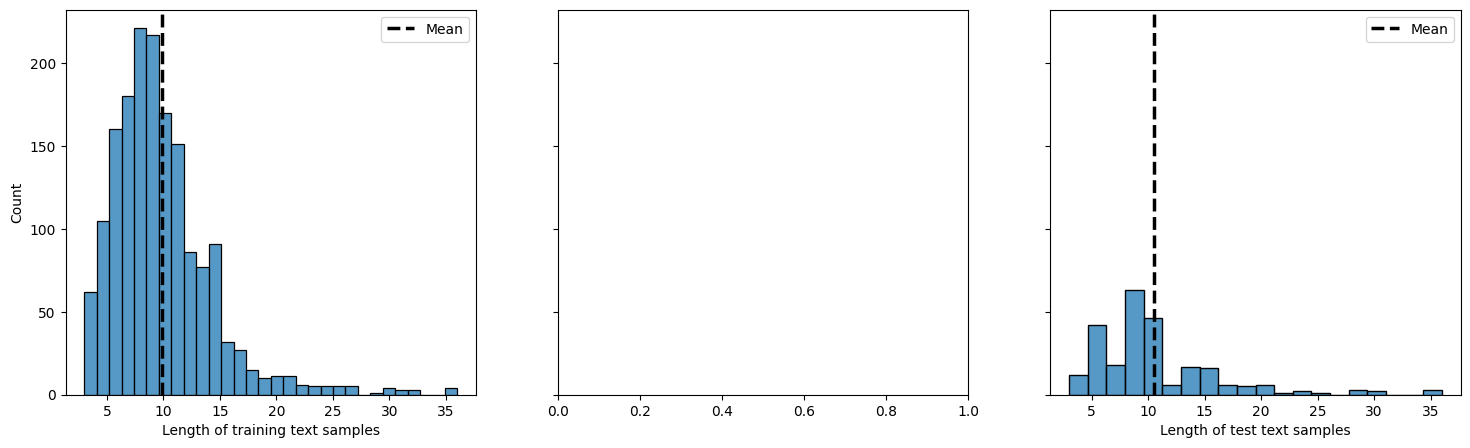

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

#train_lengths = train_df["text"].str.len()
sns.histplot(ax=axes[0], data=train_word_length, bins=30).set(xlabel="Length of training text samples")
axes[0].axvline(train_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

#dev_lengths = dev_df["text"].str.len()
#sns.histplot(ax=axes[1], data=dev_word_length, bins=20).set(xlabel="Length of dev text samples")
#axes[1].axvline(dev_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
#axes[1].legend()

#test_lengths = test_df["Text"].str.len()
sns.histplot(ax=axes[2], data=test_word_length, bins=20).set(xlabel="Length of test text samples")
axes[2].axvline(test_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[2].legend()


plt.show()

In [ ]:
print(f"Max words length of Train rows {train_word_length.max()}")
#print(f"Max words length of Dev rows {dev_word_length.mean()}")
print(f"Max words length of Test rows {test_word_length.max()}")

Max words length of Train rows 36
Max words length of Test rows 36


In [ ]:
##train_data["News1"] = train_data["News"].astype(str)  #for converting all data in "News" column into string as all are not string
#train_corpus = ''.join(train_data["News1"])
#print(train_corpus)
import re

train_corpus = train_data["News"].astype(str).sum()
#valid_corpus = dev_data["News"].sum()
test_corpus = test_data["News"].astype(str).sum()

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

#valid_corpus = re.sub(chars_to_ignore, ' ', valid_corpus)
#valid_vocab = set(valid_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
#print("Number of unique words in validation data:", len(valid_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 9371
Number of unique words in test data: 1888
Number of out-of-vocabulary (OOV) words: 692


## Preprocessing

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoj = re.compile("["         # this emoj is to remove all emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    #english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)


    text=emoj.sub(r'',text)
    text=text.lower()
    # Stopword Removing

    #text=english_pattern.sub(r'', text)
    #def remove_emojis(text):
    #text= emoji.get_emoji_regexp().sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '|¢|Ñ+-৳০১২৩৪৫৬৭৮৯।()-[]{}<>@#$%^&*_~—॥🤣⚽️✌😀💉�￰৷￰'

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
train_data['cleanNews'] = train_data.News.apply(lambda x: preprocessing(str(x)))
test_data['cleanNews'] = test_data.News.apply(lambda x: preprocessing(str(x)))
#train_data['Label'] = train_data.Label.apply(lambda x: preprocessing(str(x)))

#dev_df['cleanText']=dev_df.text.apply(lambda x: preprocessing(str(x)))
#test_df['cleanText']=test_df.cleanText.apply(lambda x: preprocessing(str(x)))

In [ ]:
#train_data["News1"] = train_data["cleanNews"].astype(str)  #for converting all data in "News" column into string as all are not string
#train_corpus = ''.join(train_data["News1"])
#print(train_corpus)

In [ ]:
train_data.Label.value_counts()

False           1095
MOSTLY FALSE     239
FALSE            149
HALF TRUE        141
PARTLY FALSE      42
MOSTLY TRUE        1
Name: Label, dtype: int64

In [ ]:
train_data['Label']=train_data['Label'].astype(str)
print(train_data['Label'].dtype)
# Convert boolean False to string 'FALSE'
train_data['Label'] = train_data['Label'].astype(str).replace({'False': 'FALSE'})

# Strip extra spaces in string labels
train_data['Label'] = train_data['Label'].str.strip()
#train_data['Label']=train_data['Label'].str.lower()
#test_data['Label']=test_data['Label'].astype(str)
#test_data['Label']=test_data['Label'].str.lower()

object


In [ ]:
print(train_data.Label.value_counts())
print(test_data.FactCheck.value_counts())

FALSE           1244
MOSTLY FALSE     239
HALF TRUE        141
PARTLY FALSE      42
MOSTLY TRUE        1
Name: Label, dtype: int64
False news           149
Mostly False news     45
MOSTLY False news     17
Half true             17
Partly False news     11
HALF TRUE              7
PARTLY False news      3
Name: FactCheck, dtype: int64


In [ ]:
test_data['FactCheck'] = test_data['FactCheck'].astype(str).replace({'Mostly False news': 'MOSTLY FALSE'})
test_data['FactCheck'] = test_data['FactCheck'].astype(str).replace({'MOSTLY False news': 'MOSTLY FALSE'})
test_data['FactCheck'] = test_data['FactCheck'].astype(str).replace({'Half true': 'HALF TRUE'})
test_data['FactCheck'] = test_data['FactCheck'].astype(str).replace({'Partly False news': 'PARTLY FALSE'})
test_data['FactCheck'] = test_data['FactCheck'].astype(str).replace({'PARTLY False news': 'PARTLY FALSE'})
test_data['FactCheck'] = test_data['FactCheck'].astype(str).replace({'False news': 'FALSE'})

In [ ]:
test_data.FactCheck.value_counts()

FALSE           149
MOSTLY FALSE     62
HALF TRUE        24
PARTLY FALSE     14
Name: FactCheck, dtype: int64

In [ ]:
#train_data['enc_label'] = train_data['Label'].replace({'false':0, 'mostly false':1,'half true':2,'partialy false':3,'mostly true':4})  #not working as here always 6 classes exist though I have converted False and FALSE to false it figure out two false category

train_data['enc_label'] = train_data['Label'].replace({'MOSTLY FALSE':1,'HALF TRUE':2,'PARTLY FALSE':3,'MOSTLY TRUE':4,'FALSE':0})
test_data['enc_label'] = test_data['FactCheck'].replace({'MOSTLY FALSE':1,'HALF TRUE':2,'PARTLY FALSE':3,'MOSTLY TRUE':4,'FALSE':0})
#dev_df['enc_label'] = dev_df['label'].replace({'original':1, 'Fake':0})
train_data.tail(150)

,ID,News,Label,cleanNews,enc_label
1519,FAKE_2520,"2020 മാർച്ചിനും ഓഗസ്റ്റിനും ഇടയിൽ, ""ആരും അറിയാ...",FALSE,"2020 മാർച്ചിനും ഓഗസ്റ്റിനും ഇടയിൽ, ""ആരും അറിയാ...",0
1520,FAKE_2521,ജെഫ്രി എപ്സ്റ്റീനുമൊത്തുള്ള ബിൽ ക്ലിന്റന്റെ ചി...,FALSE,ജെഫ്രി എപ്സ്റ്റീനുമൊത്തുള്ള ബിൽ ക്ലിന്റന്റെ ചി...,0
1521,FAKE_2522,എന്തുകൊണ്ടാണ് ബ്രെക്സിറ്റിന് വോട്ട് ചെയ്തതെന്ന...,MOSTLY FALSE,എന്തുകൊണ്ടാണ് ബ്രെക്സിറ്റിന് വോട്ട് ചെയ്തതെന്ന...,1
1522,FAKE_2523,പ്രസിഡന്റ് ട്രംപിനെതിരായ തിരയൽ ഫലങ്ങളിൽ ഓൺലൈൻ ...,FALSE,പ്രസിഡന്റ് ട്രംപിനെതിരായ തിരയൽ ഫലങ്ങളിൽ ഓൺലൈൻ ...,0
1523,FAKE_2524,"കുറ്റകൃത്യം', 'ക്രിമിനൽ പ്രവർത്തനം', 'കുറ്റാരോ...",MOSTLY FALSE,"കുറ്റകൃത്യം', 'ക്രിമിനൽ പ്രവർത്തനം', 'കുറ്റാരോ...",1
...,...,...,...,...,...
1664,FAKE_2665,ഷിർദിയിലെ സായി ക്ഷേത്രത്തിൽ ഹിന്ദുക്കൾ നൽകുന്ന...,FALSE,ഷിർദിയിലെ സായി ക്ഷേത്രത്തിൽ ഹിന്ദുക്കൾ നൽകുന്ന...,0
1665,FAKE_2666,ഉത്തര്പ്രദേശിലെ മദ്രസയില് യുവാവ് കുട്ടിയെ ക്രൂ...,FALSE,ഉത്തര്പ്രദേശിലെ മദ്രസയില് യുവാവ് കുട്ടിയെ ക്രൂ...,0
1666,FAKE_2667,ഐഎസ്ആർഒ ചന്ദ്രയാൻ -3 മിഷൻ ശനിയിൽ ഇറങ്ങുന്നതിന്...,FALSE,ഐഎസ്ആർഒ ചന്ദ്രയാൻ 3 മിഷൻ ശനിയിൽ ഇറങ്ങുന്നതിന്റ...,0
1667,FAKE_2668,ഹിലാരി ചുഴലിക്കാറ്റിനെ തുടര്ന്ന് വിമാനം തകര്ന്...,FALSE,ഹിലാരി ചുഴലിക്കാറ്റിനെ തുടര്ന്ന് വിമാനം തകര്ന്...,0


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'features' contains your input features and 'labels' contains your target labels
# Replace these with your actual feature and label variables

# Splitting the dataset into 70% training, 15% validation, and 15% test
# Adjust the test_size and validation_size parameters as needed
X_train, X_valid, y_train, y_valid = train_test_split(train_data['cleanNews'], train_data['Label'], test_size=0.11, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 'X_train' and 'y_train' are your training features and labels
# 'X_val' and 'y_val' are your validation features and labels
# 'X_test' and 'y_test' are your test features and labels


## ktrain BERT

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 66.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 45.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=f12b0236d967ba0e9105b6f59a8cb4a9baaeedaef4952d63086fde0c5ffc2e4f
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import ktrain
from ktrain import text

In [ ]:
train_data['Label'].value_counts()

FALSE           1246
MOSTLY FALSE     239
HALF TRUE        141
PARTLY FALSE      42
MOSTLY TRUE        1
Name: Label, dtype: int64

In [ ]:
categories = ['MOSTLY FALSE', 'HALF TRUE', 'PARTLY FALSE', 'MOSTLY TRUE','FALSE']   #also try with 6 classes

In [ ]:
X_train = X_train.tolist()
y_train = y_train.tolist()

X_valid = X_valid.tolist()
y_valid = y_valid.tolist()

X_test = test_data['cleanNews'].tolist()
y_test = test_data['FactCheck'].tolist()

### MURIL


In [ ]:
model_name = 'google/muril-large-cased'
trans = text.Transformer(model_name,maxlen=30,class_names=categories)  # try for maxlen=180

config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.03G [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train,y_train)
#valid = trans.preprocess_test(X_valid,y_valid)
test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: ml
train sequence lengths:
	mean : 10
	95percentile : 18
	99percentile : 27


Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
111/111 [==============================] - 44s 200ms/step - loss: 1.6730 - accuracy: 0.0390
Epoch 2/10
111/111 [==============================] - 22s 198ms/step - loss: 1.2308 - accuracy: 0.6160
Epoch 3/10
111/111 [==============================] - 22s 198ms/step - loss: 0.8744 - accuracy: 0.7460
Epoch 4/10
111/111 [==============================] - 22s 201ms/step - loss: 0.8407 - accuracy: 0.7521
Epoch 5/10
111/111 [==============================] - 22s 196ms/step - loss: 0.8459 - accuracy: 0.7445
Epoch 6/10
111/111 [==============================] - 22s 199ms/step - loss: 0.9281 - accuracy: 0.7286
Epoch 7/10
111/111 [==============================] - 22s 200ms/step - loss: 5.7147 - accuracy: 0.6206
Epoch 8/10
111/111 [==============================] - 0s 49us/step - loss: 12.2412 - accuracy: 0.8333


done.
Visually inspect loss plot and select learning rate associated with falling loss


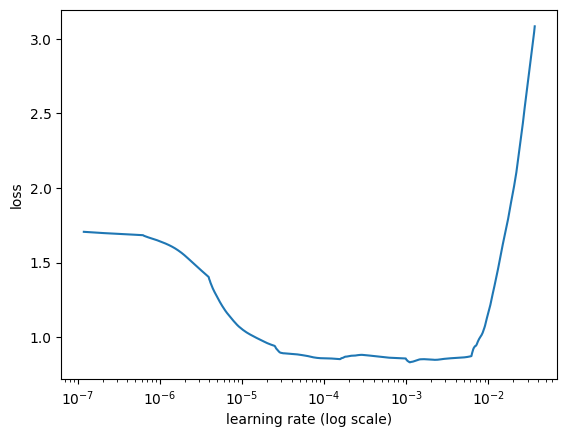

In [ ]:
learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight('balanced',classes=np.unique(train_data['Label']),y=train_data['Label'])

weight = {i : class_weights[i] for i in range(5)} #change this range
weight

{0: 0.2678972712680578,
 1: 2.367375886524823,
 2: 1.396652719665272,
 3: 333.8,
 4: 7.947619047619048}

In [ ]:
learner.fit_onecycle(3e-5,15,class_weight=weight)     #mbert 2e-5--->(0.5/.18)    1e-3--->0.18          1e-4---->0.0
                            #xlmroberta
                            # 'Vasanth/tamil-sentiment-distilbert' 1e-5--> .09(macro .12)    1e-4--->.75(macro .21 weighted .64  training accuracy: .35)   1e-3--> .02  4e-4-->0.02
                            #'l3cube-pune/indic-sentence-bert-nli'



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
124/124 [==============================] - 52s 415ms/step - loss: 0.0322 - accuracy: 0.9926 - val_loss: 1.4600 - val_accuracy: 0.6880
Epoch 2/15
124/124 [==============================] - 51s 411ms/step - loss: 0.0083 - accuracy: 0.9980 - val_loss: 1.4753 - val_accuracy: 0.7160
Epoch 3/15
124/124 [==============================] - 52s 416ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.5219 - val_accuracy: 0.7080
Epoch 4/15
124/124 [==============================] - 51s 411ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.5707 - val_accuracy: 0.7120
Epoch 5/15
124/124 [==============================] - 51s 415ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.6331 - val_accuracy: 0.6960
Epoch 6/15
124/124 [==============================] - 52s 416ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 1.6794 - val_accuracy: 0.7080
Epoch 7/15
124/124 [==============================] - 51s 415ms/ste

In [ ]:
categories = ['MOSTLY FALSE', 'HALF TRUE', 'PARTLY FALSE', 'FALSE']

In [ ]:
learner.validate(class_names=categories)#class_names=categories  #while using vasanthtamilmix use learner.validate() without passing any parameter

8/8 [==============================] - 2s 219ms/step
              precision    recall  f1-score   support

MOSTLY FALSE       0.75      0.93      0.83       149
   HALF TRUE       0.56      0.38      0.45        24
PARTLY FALSE       0.66      0.49      0.56        63
       FALSE       0.67      0.14      0.24        14

    accuracy                           0.72       250
   macro avg       0.66      0.48      0.52       250
weighted avg       0.70      0.72      0.69       250



array([[138,   3,   7,   1],
       [  7,   9,   8,   0],
       [ 28,   4,  31,   0],
       [ 11,   0,   1,   2]])

In [ ]:
print(train_df['Label'].unique())
print(train_df['Label'].dtype)
unique_classes = np.unique(y_train)
print(unique_classes)
print(train_df['Label'].shape)  # Check the shape of X_train_tfidf
print(len(train_df['Label']))

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/tamil_fake_muril-bert_52f1_predictor')

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/tamil_fake_muril-bert_52f1_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('tamil_fake_muril-bert_cw.csv',index = False)

### mBERT

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=30,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
#valid = trans.preprocess_test(X_valid,y_valid)
test = trans.preprocess_test(X_test,y_test)
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15,class_weight=weight)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 10
	95percentile : 18
	99percentile : 27


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
124/124 [==============================] - 46s 237ms/step - loss: 1.8132 - accuracy: 0.1818 - val_loss: 1.4994 - val_accuracy: 0.0560
Epoch 2/15
124/124 [==============================] - 26s 207ms/step - loss: 1.7786 - accuracy: 0.1838 - val_loss: 1.5141 - val_accuracy: 0.1000
Epoch 3/15
124/124 [==============================] - 23s 187ms/step - loss: 1.7963 - accuracy: 0.0956 - val_loss: 1.5641 - val_accuracy: 0.1280
Epoch 4/15
124/124 [==============================] - 24s 190ms/step - loss: 1.7001 - accuracy: 0.1657 - val_loss: 1.5569 - val_accuracy: 0.1040
Epoch 5/15
124/124 [==============================] - 20s 165ms/step - loss: 1.7980 - accuracy: 0.1596 - val_loss: 1.5582 - val_accuracy: 0.1520
Epoch 6/15
124/124 [==============================] - 22s 175ms/step - loss: 1.6722 - accuracy: 0.0828 - val_loss: 1.6445 - val_accuracy: 0.1280
Epoch 7/15
124/124 [==============================] - 25s 204ms/ste

In [ ]:
#//categories = ['MOSTLY FALSE', 'HALF TRUE', 'PARTLY FALSE', 'FALSE']

In [ ]:
learner.validate(class_names=categories)#class_names=categories  #while using vasanthtamilmix use learner.validate() without passing any parameter

8/8 [==============================] - 6s 222ms/step
              precision    recall  f1-score   support

MOSTLY FALSE       0.00      0.00      0.00       149
   HALF TRUE       0.09      0.92      0.17        24
PARTLY FALSE       0.00      0.00      0.00        63
       FALSE       0.20      0.14      0.17        14

    accuracy                           0.10       250
   macro avg       0.07      0.26      0.08       250
weighted avg       0.02      0.10      0.03       250



array([[  0, 143,   0,   6],
       [  0,  22,   0,   2],
       [  0,  63,   0,   0],
       [  0,  12,   0,   2]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/tamil_fake_m-bert_08f1_predictor')

### XLMR

In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=30,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
#valid = trans.preprocess_test(X_valid,y_valid)
test = trans.preprocess_test(X_test,y_test)
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15,class_weight=weight)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 10
	95percentile : 18
	99percentile : 27


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
124/124 [==============================] - 47s 225ms/step - loss: 1.8247 - accuracy: 0.3623 - val_loss: 1.4532 - val_accuracy: 0.5320
Epoch 2/15
124/124 [==============================] - 25s 202ms/step - loss: 1.7316 - accuracy: 0.3104 - val_loss: 1.4871 - val_accuracy: 0.5400
Epoch 3/15
124/124 [==============================] - 25s 204ms/step - loss: 1.7183 - accuracy: 0.3367 - val_loss: 1.4578 - val_accuracy: 0.4680
Epoch 4/15
124/124 [==============================] - 26s 207ms/step - loss: 1.7371 - accuracy: 0.2525 - val_loss: 1.5155 - val_accuracy: 0.1680
Epoch 5/15
124/124 [==============================] - 25s 201ms/step - loss: 1.7364 - accuracy: 0.1919 - val_loss: 1.5334 - val_accuracy: 0.0800
Epoch 6/15
124/124 [==============================] - 25s 203ms/step - loss: 1.7455 - accuracy: 0.1461 - val_loss: 1.5716 - val_accuracy: 0.2520
Epoch 7/15
124/124 [==============================] - 26s 208ms/ste

In [ ]:
#//categories = ['MOSTLY FALSE', 'HALF TRUE', 'PARTLY FALSE', 'FALSE']
learner.validate(class_names=categories)#class_names=categories  #while using vasanthtamilmix use learner.validate() without passing any parameter

8/8 [==============================] - 4s 118ms/step
              precision    recall  f1-score   support

MOSTLY FALSE       0.00      0.00      0.00       149
   HALF TRUE       0.00      0.00      0.00        24
PARTLY FALSE       0.00      0.00      0.00        63
       FALSE       0.06      1.00      0.11        14

    accuracy                           0.06       250
   macro avg       0.01      0.25      0.03       250
weighted avg       0.00      0.06      0.01       250



array([[  0,   0,   0, 149],
       [  0,   0,   0,  24],
       [  0,   0,   0,  63],
       [  0,   0,   0,  14]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/tamil_fake_xlmr-bert_03f1_predictor')

### Indic-SBERT

In [ ]:
model_name = 'l3cube-pune/indic-sentence-bert-nli'
trans = text.Transformer(model_name,maxlen=30,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
#valid = trans.preprocess_test(X_valid,y_valid)
test = trans.preprocess_test(X_test,y_test)
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15,class_weight=weight)

preprocessing train...
language: ml
train sequence lengths:
	mean : 10
	95percentile : 18
	99percentile : 27


Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
124/124 [==============================] - 49s 207ms/step - loss: 1.6739 - accuracy: 0.1212 - val_loss: 1.6061 - val_accuracy: 0.1280
Epoch 2/15
124/124 [==============================] - 23s 181ms/step - loss: 1.6686 - accuracy: 0.1684 - val_loss: 1.6018 - val_accuracy: 0.2200
Epoch 3/15
124/124 [==============================] - 24s 190ms/step - loss: 1.6646 - accuracy: 0.2337 - val_loss: 1.5952 - val_accuracy: 0.2120
Epoch 4/15
124/124 [==============================] - 22s 181ms/step - loss: 1.6447 - accuracy: 0.3407 - val_loss: 1.5778 - val_accuracy: 0.0760
Epoch 5/15
124/124 [==============================] - 23s 184ms/step - loss: 1.6197 - accuracy: 0.0869 - val_loss: 1.5709 - val_accuracy: 0.2520
Epoch 6/15
124/124 [==============================] - 22s 181ms/step - loss: 1.5798 - accuracy: 0.1212 - val_loss: 1.5304 - val_accuracy: 0.2000
Epoch 7/15
124/124 [==============================] - 23s 184ms/ste

In [ ]:
#//categories = ['MOSTLY FALSE', 'HALF TRUE', 'PARTLY FALSE', 'FALSE']
learner.validate(class_names=categories)

8/8 [==============================] - 4s 121ms/step
              precision    recall  f1-score   support

MOSTLY FALSE       0.78      0.05      0.09       149
   HALF TRUE       0.23      0.12      0.16        24
PARTLY FALSE       0.26      0.90      0.40        63
 MOSTLY TRUE       0.00      0.00      0.00         0
       FALSE       0.40      0.14      0.21        14

    accuracy                           0.28       250
   macro avg       0.33      0.24      0.17       250
weighted avg       0.57      0.28      0.18       250



array([[  7,   5, 134,   1,   2],
       [  0,   3,  20,   0,   1],
       [  2,   4,  57,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   1,  11,   0,   2]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/tamil_fake_indic-bert_17f1_predictor')

### Distilmbert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=30,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
#valid = trans.preprocess_test(X_valid,y_valid)
test = trans.preprocess_test(X_test,y_test)
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=12)
learner.fit_onecycle(3e-5,15,class_weight=weight)

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 10
	95percentile : 18
	99percentile : 27


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
124/124 [==============================] - 23s 117ms/step - loss: 2.0234 - accuracy: 0.2027 - val_loss: 1.3859 - val_accuracy: 0.5960
Epoch 2/15
124/124 [==============================] - 13s 105ms/step - loss: 1.9145 - accuracy: 0.1886 - val_loss: 1.4277 - val_accuracy: 0.5440
Epoch 3/15
124/124 [==============================] - 13s 103ms/step - loss: 1.8126 - accuracy: 0.3657 - val_loss: 1.5560 - val_accuracy: 0.0560
Epoch 4/15
124/124 [==============================] - 13s 103ms/step - loss: 1.7661 - accuracy: 0.1630 - val_loss: 1.5564 - val_accuracy: 0.3640
Epoch 5/15
124/124 [==============================] - 13s 103ms/step - loss: 1.6578 - accuracy: 0.1394 - val_loss: 1.5267 - val_accuracy: 0.0840
Epoch 6/15
124/124 [==============================] - 13s 102ms/step - loss: 1.6751 - accuracy: 0.0956 - val_loss: 1.5328 - val_accuracy: 0.1520
Epoch 7/15
124/124 [==============================] - 13s 104ms/ste

In [ ]:
categories = ['MOSTLY FALSE', 'HALF TRUE', 'PARTLY FALSE', 'FALSE']
learner.validate(class_names=categories)

8/8 [==============================] - 1s 64ms/step
              precision    recall  f1-score   support

MOSTLY FALSE       0.67      0.72      0.69       149
   HALF TRUE       0.32      0.29      0.30        24
PARTLY FALSE       0.46      0.44      0.45        63
       FALSE       0.57      0.29      0.38        14

    accuracy                           0.58       250
   macro avg       0.50      0.43      0.46       250
weighted avg       0.58      0.58      0.58       250



array([[107,  10,  29,   3],
       [ 14,   7,   3,   0],
       [ 30,   5,  28,   0],
       [  9,   0,   1,   4]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)
predictor.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/tamil_fake_distilm-bert_f146_predictor')

## Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



#TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:


# Example: Training individual models
model_rf = RandomForestClassifier(class_weight='balanced',n_estimators=100)#max_sample .5-.75
model_rf.fit(X_train_tfidf, y_train)

model_lr = LogisticRegression(class_weight='balanced',max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

model_svm = SVC(kernel='linear',class_weight='balanced')
model_svm.fit(X_train_tfidf, y_train)

model_dt = DecisionTreeClassifier(class_weight='balanced')
model_dt.fit(X_train_tfidf,y_train)



DecisionTreeClassifier(class_weight='balanced')

## RF

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model_rf.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,digits=4)

print(f"Accuracy: {accuracy:.4}")
print("Classification Report:")
print(report)

Accuracy: 0.692
Classification Report:
              precision    recall  f1-score   support

       FALSE     0.6593    1.0000    0.7947       149
   HALF TRUE     1.0000    0.2917    0.4516        24
MOSTLY FALSE     1.0000    0.2381    0.3846        63
PARTLY FALSE     1.0000    0.1429    0.2500        14

    accuracy                         0.6920       250
   macro avg     0.9148    0.4182    0.4702       250
weighted avg     0.7969    0.6920    0.6279       250



## SVM

In [ ]:

from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model_svm.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f"Accuracy: {accuracy:.4}")
print("Classification Report:")
print(report)

Accuracy: 0.532
Classification Report:
              precision    recall  f1-score   support

       FALSE     0.6838    0.6242    0.6526       149
   HALF TRUE     0.2750    0.4583    0.3437        24
MOSTLY FALSE     0.3571    0.3968    0.3759        63
PARTLY FALSE     1.0000    0.2857    0.4444        14

    accuracy                         0.5320       250
   macro avg     0.5790    0.4413    0.4542       250
weighted avg     0.5800    0.5320    0.5416       250



## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.datasets import fetch_20newsgroups

Xx_train, Xx_valid, yy_train, yy_valid = train_test_split(train_data['cleanNews'], train_data['enc_label'], test_size=0.13, random_state=42) # xgboost work with int or bool labeled data

tfidf = TfidfVectorizer(max_features=5000)
Xx_train_tfidf = tfidf.fit_transform(Xx_train)
Xx_val_tfidf = tfidf.transform(Xx_valid)
Xx_test_tfidf = tfidf.transform(X_test)
yy_test = test_data['enc_label']
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)))#len(set(y_train))
model_xgb.fit(Xx_train_tfidf, yy_train)

y_pred = model_xgb.predict(Xx_test_tfidf)

# Evaluation
accuracy = accuracy_score(yy_test, y_pred)
report = classification_report(yy_test, y_pred, digits=4)

print(f"Accuracy: {accuracy:.4}")
print("Classification Report:")
print(report)


Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0     0.6589    0.9463    0.7769       149
           1     0.6400    0.2540    0.3636        63
           2     0.6667    0.2500    0.3636        24
           3     1.0000    0.1429    0.2500        14

    accuracy                         0.6600       250
   macro avg     0.7414    0.3983    0.4385       250
weighted avg     0.6740    0.6600    0.6036       250



## Majority Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data (replace this with your own data)
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different classifiers
clf1 = DecisionTreeClassifier(random_state=42,class_weight='balanced')
clf2 = SVC(probability=True, random_state=42,class_weight='balanced')
clf3 = LogisticRegression(random_state=42,class_weight='balanced')

# Create a VotingClassifier with majority voting
voting_clf = VotingClassifier(
    estimators=[('dt', clf1), ('svm', clf2), ('lr', clf3)],
    voting='hard'  # 'hard' for majority voting based on predicted class labels
)

# Fit the ensemble model
voting_clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = voting_clf.predict(X_val_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, digits = 4)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.6617
Classification Report:
              precision    recall  f1-score   support

       FALSE     0.7544    0.8583    0.8030       247
   HALF TRUE     0.1000    0.0870    0.0930        23
MOSTLY FALSE     0.1875    0.1111    0.1395        54
PARTLY FALSE     1.0000    0.1000    0.1818        10

    accuracy                         0.6617       334
   macro avg     0.5105    0.2891    0.3044       334
weighted avg     0.6251    0.6617    0.6283       334



## Deep Learning

In [ ]:
!pip install --upgrade keras tensorflow

  Using cached keras-3.0.1-py3-none-any.whl (999 kB)
  Using cached namex-0.0.7-py3-none-any.whl (5.8 kB)


In [ ]:
import os
#print(os.listdir("../input"))
os.environ['KERAS_BACKEND'] = 'tensorflow'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional #,CuDNNLSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm

#text=train_data['cleanNews']


Tensorflow Version:-- 2.15.0


In [ ]:
max_len = 30

token = Tokenizer()
token.fit_on_texts(train_data['cleanNews'])
train_seq = token.texts_to_sequences(train_data['cleanNews'])
train_pad_seq = pad_sequences(train_seq,maxlen=max_len)

dev_seq = token.texts_to_sequences(X_valid)
dev_pad_seq = pad_sequences(dev_seq,maxlen=max_len)

vocab_size = len(token.word_index)+1

In [ ]:
test_seq = token.texts_to_sequences(test_data['cleanNews'])
test_pad_seq = pad_sequences(test_seq,maxlen=max_len)

In [ ]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-12-18 12:14:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2023-12-18 12:17:30 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
embedding_vector = {}
f = open('glove.6B.300d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

400000it [00:34, 11601.18it/s]
100%|██████████| 9082/9082 [00:00<00:00, 1007023.26it/s]


### BiLSTM

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_data['enc_label']), y=train_data['enc_label'])

weight = {i: class_weights[i] for i in range(len(class_weights))}

weight

{0: 0.2680064308681672,
 1: 1.394979079497908,
 2: 2.3645390070921986,
 3: 7.938095238095238,
 4: 333.4}

In [ ]:
num_classes = 5

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 1/fake_t2-off-BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           2724900   
                                                                 
 bidirectional (Bidirection  (None, 30, 400)           801600    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 12000)             0         
                                                                 
 dense (Dense)               (None, 6)                 72006     
                                                                 
Total params: 3598506 (13.73 MB)
Trainable params: 873606 (3.33 MB)
Non-trainable params: 2724900 (10.39 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_pad_seq,
    train_data['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

Epoch 1/15
21/21 [==============================] - ETA: 0s - loss: 2.5902 - accuracy: 0.0758
Epoch 1: val_accuracy did not improve from 0.11111
21/21 [==============================] - 6s 68ms/step - loss: 2.5902 - accuracy: 0.0758 - val_loss: 1.6162 - val_accuracy: 0.0269
Epoch 2/15
18/21 [========================>.....] - ETA: 0s - loss: 1.8558 - accuracy: 0.0556
Epoch 2: val_accuracy did not improve from 0.11111
21/21 [==============================] - 0s 14ms/step - loss: 1.7888 - accuracy: 0.0555 - val_loss: 1.6501 - val_accuracy: 0.0299
Epoch 3/15
19/21 [==========================>...] - ETA: 0s - loss: 1.7746 - accuracy: 0.1003
Epoch 3: val_accuracy did not improve from 0.11111
21/21 [==============================] - 0s 12ms/step - loss: 1.7401 - accuracy: 0.0975 - val_loss: 1.6904 - val_accuracy: 0.0419
Epoch 4/15
15/21 [====================>.........] - ETA: 0s - loss: 1.8287 - accuracy: 0.0635
Epoch 4: val_accuracy did not improve from 0.11111
21/21 [=======================

In [ ]:
# Load the saved model
model = load_model(filepath)
# prediction
#y_pred = np.argmax(model.predict(dev_pad_seq), axis=-1)

#print_metrices(y_pred,valid_data['enc_label'])


In [ ]:
test_pred = np.argmax(model.predict(test_pad_seq), axis=-1).tolist()
#test_pred
yy_test = test_data['enc_label']
print("F1-Score:",f1_score(yy_test,test_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(yy_test,test_pred)*100)
#Show precision and recall per genre
report = classification_report(yy_test, test_pred,digits=4)


#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

#test_pred = np.argmax(model.predict(test_pad_seq), axis=-1).tolist()
#print_metrices(test_pred,test_data['enc_label'])

8/8 [==============================] - 1s 5ms/step
F1-Score: 18.886299572690838
Accuracy: 11.244979919678714
Classification Report:
              precision    recall  f1-score   support

           0     0.9333    0.0940    0.1707       149
           1     0.6667    0.1290    0.2162        62
           2     0.3571    0.2083    0.2632        24
           3     1.0000    0.0714    0.1333        14
           4     0.0000    0.0000    0.0000         0

    accuracy                         0.1124       249
   macro avg     0.5914    0.1006    0.1567       249
weighted avg     0.8151    0.1124    0.1889       249



In [ ]:
frequency = {}

# Count occurrences manually
for item in test_pred:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1

# Print the frequency
for item, count in frequency.items():
    print(f"{item}: {count} times")

4: 207 times
0: 15 times
3: 1 times
2: 14 times
1: 12 times


### CNN

In [ ]:
max_len = 30

token = Tokenizer()
token.fit_on_texts(train_data['cleanNews'])
train_seq = token.texts_to_sequences(train_data['cleanNews'])
train_pad_seq = pad_sequences(train_seq,maxlen=max_len)

dev_seq = token.texts_to_sequences(X_valid)
dev_pad_seq = pad_sequences(dev_seq,maxlen=max_len)

vocab_size = len(token.word_index)+1
test_seq = token.texts_to_sequences(test_data['cleanNews'])
test_pad_seq = pad_sequences(test_seq,maxlen=max_len)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

num_classes = 5

# Building the CNN model
model = Sequential()
model.add(Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 30, 300)           2724900   
                                                                 
 conv1d_15 (Conv1D)          (None, 26, 128)           192128    
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 13, 128)           0         
 ng1D)                                                           
                                                                 
 dense_19 (Dense)            (None, 13, 10)            1290      
                                                                 
 dense_20 (Dense)            (None, 13, 1)             11        
                                                                 
Total params: 2918329 (11.13 MB)
Trainable params: 193429 (755.58 KB)
Non-trainable params: 2724900 (10.39 MB)
________

In [ ]:
history = model.fit(train_pad_seq,
                    train_data['enc_label'],
                    epochs=15,
                    verbose=1,#False
                    validation_split=0.2,
                    #validation_data=(X_test, y_test),
                    batch_size=32,
                    class_weight = weight)

Epoch 1/15
42/42 [==============================] - 4s 11ms/step - loss: 2.8269 - accuracy: 0.1545 - val_loss: 2.5649 - val_accuracy: 0.0988
Epoch 2/15
42/42 [==============================] - 0s 7ms/step - loss: 2.8269 - accuracy: 0.1545 - val_loss: 2.5649 - val_accuracy: 0.0988
Epoch 3/15
42/42 [==============================] - 0s 6ms/step - loss: 2.8269 - accuracy: 0.1545 - val_loss: 2.5649 - val_accuracy: 0.0988
Epoch 4/15
42/42 [==============================] - 0s 7ms/step - loss: 2.8269 - accuracy: 0.1545 - val_loss: 2.5649 - val_accuracy: 0.0988
Epoch 5/15
42/42 [==============================] - 0s 6ms/step - loss: 2.8269 - accuracy: 0.1545 - val_loss: 2.5649 - val_accuracy: 0.0988
Epoch 6/15
42/42 [==============================] - 0s 7ms/step - loss: 2.8269 - accuracy: 0.1545 - val_loss: 2.5649 - val_accuracy: 0.0988
Epoch 7/15
42/42 [==============================] - 0s 7ms/step - loss: 2.8269 - accuracy: 0.1545 - val_loss: 2.5649 - val_accuracy: 0.0988
Epoch 8/15
42/42 [=

In [ ]:
#loss, accuracy = model.evaluate(test_pad_seq, test_data['enc_label'])
#print(f'Test accuracy: {accuracy}')

test_pred = np.argmax(model.predict(test_pad_seq), axis=-1).tolist()
#test_pred

yy_test = test_data['enc_label']
#print("F1-Score:",f1_score(yy_test,test_pred,average='weighted')*100)
#print("Accuracy:",accuracy_score(yy_test,test_pred)*100)
#Show precision and recall per genre
report = classification_report(yy_test, test_pred,digits=4)


#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

8/8 [==============================] - 0s 3ms/step


ValueError: ignored